# COMP 7150 Final Exam

WRITE YOUR NAME HERE: Nitya Kanthi Nadimpalli

Note: a violation of academic misconduct results in failing the course.

----

We use the kidney disease dataset for this exam. Each row represents one person.  The target variable (classification) indicates if the person has kidney disease for not (value of 1 means having the disease; 0 mean not having the disease).  Here are the features:
```
age - age 
bp - blood pressure 
sg - specific gravity 
al - albumin 
su - sugar 
rbc - red blood cells 
pc - pus cell 
pcc - pus cell clumps 
ba - bacteria 
bgr - glucose in blood (aka blood glucose random)
bu - blood urea 
sc - serum creatinine 
sod - sodium 
pot - potassium 
hemo - hemoglobin 
pcv - packed cell volume 
wc - white blood cell count 
rc - red blood cell count 
htn - hypertension 
dm - diabetes mellitus 
cad - coronary artery disease 
appet - appetite 
pe - pedal edema 
ane - anemia 
```


In [143]:
import warnings
warnings.filterwarnings('ignore')

In [144]:
import pandas

data = pandas.read_csv('../Data_sets/kidney_disease.csv')

In [145]:
data.sample(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
42,47.0,100.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,204.0,...,33,9200,4.5,yes,no,no,good,no,yes,1
257,38.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,91.0,...,46,9100,5.8,no,no,no,good,no,no,0
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,0
28,75.0,70.0,NaN,1.0,3.0,NaN,NaN,notpresent,notpresent,123.0,...,NaN,NaN,NaN,no,yes,no,good,no,no,1
319,30.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,138.0,...,NaN,NaN,NaN,no,no,no,good,no,no,0



**Note: subsequent problems implicitly refer to previous questions.**

---
**Problem 1**

Which features have more than 100 missing data points?  Create a new dataset (dataframe) without these features. Do not drop the remaining missing data at this point. You will use this new dataset for the next problems.

In [146]:
h = ['rbc', 'wc', 'rc']
new_data = data.drop(columns=h)

m = new_data.shape
n = new_data.isna().sum()

In [147]:
m

(400, 22)

In [148]:
n

age                9
bp                12
sg                47
al                46
su                49
pc                65
pcc                4
ba                 4
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv               70
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

---
**Problem 2**

Use one figure to show the distribution of age and glucose in blood of the people who have kidney disease. Based on the visualization, describe the characteristics of these two variables.

In [149]:
import seaborn
from matplotlib import pyplot

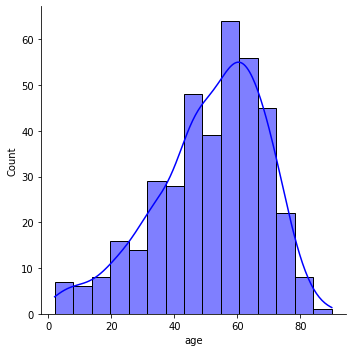

In [194]:
seaborn.displot(new_data['age'], kde=True, color='blue')

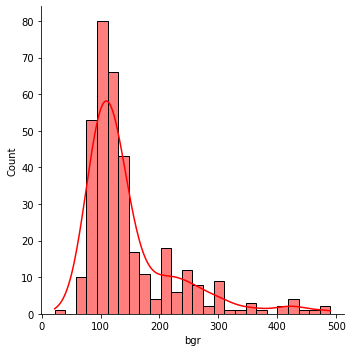

In [195]:
seaborn.displot(new_data['bgr'], kde=True, color='red')

---
**Problem 3**

Evaluate the prediction performance of a dummy classifier using the `stratified` strategy in terms precision and recall.

Use `age`, `blood pressure`, and `sugar` as features to make prediction of the target variable `classification`.  

Do not remove missing data unnecessarily.

Use ShuffleSplit with 100 splits, and random state 300424 to evaluate its performance.

Define features and the target explicitly.

Do you think that using more or better features will improve the performance of the dummy classifier?  Explain.

In [152]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import ShuffleSplit, cross_validate

X = new_data[['age', 'bp', 'su']]
y = new_data['classification']

X = X.dropna()
y = y[X.index]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X = pd.DataFrame(data=X_standardized, columns=X.columns)

knn_model = KNeighborsClassifier(n_neighbors=11)
dummy_baseline = DummyClassifier(strategy='stratified')

validator = ShuffleSplit(n_splits=100, test_size=0.05, random_state=300424)

knn_result = cross_validate(knn_model, X, y, cv=validator, scoring=['accuracy'])

baseline_result = cross_validate(dummy_baseline, X, y, cv=validator, scoring=['accuracy'])

In [153]:
knn_result['test_accuracy'].mean()

0.76

In [154]:
baseline_result['test_accuracy'].mean()

0.5082352941176471

---
**Problem 4**

Use precision and recall to evaluate the performance of a 9-nearest neighbor classifer to predict `classification`.

Use all features to make prediction. 

Define features and the target explicitly.

1. Which cross validator should be used to validate the performance of the model?
2. Explain which processing step(s) to the data must be done and why.
3. Explain which steps need to be done to properly evaluate the performance of the model.

In [155]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import ShuffleSplit, cross_validate

X = new_data.drop(columns=['classification'])
y = new_data['classification']

X = pd.get_dummies(X, drop_first=True)

X = X.dropna()
y = y.loc[X.index]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X = pd.DataFrame(data=X_standardized, columns=X.columns)

knn_model = KNeighborsClassifier(n_neighbors=9)
dummy_baseline = DummyClassifier(strategy='stratified')

validator = ShuffleSplit(n_splits=100, test_size=0.05, random_state=300424)

knn_result = cross_validate(knn_model, X, y, cv=validator, scoring=['accuracy'])

baseline_result = cross_validate(dummy_baseline, X, y, cv=validator, scoring=['accuracy'])

In [156]:
knn_result['test_accuracy'].mean()

0.9241666666666668

In [157]:
baseline_result['test_accuracy'].mean()

0.5041666666666668

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02)

In [159]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [160]:
predictions

array([0, 1, 1, 0, 1])

In [161]:
y_test.values

array([0, 1, 1, 0, 1])

TP:3
TN:2
FP:0
FN:0

Precision:3/3
Recall:3/3


---
**Problem 5**

Based on the value of recall you get, explain the meaning of this value.


### Answer:

The recall value of 1.0 says that the model successfully identified all actual positive cases without any false negatives.

---
**Problem 6**

Transform the features using PCA with two principal components.  Visualize the transformed data on these two principal components in such a way that patients who have kidney disease and do not have the disease  have different colors.

Define the features and target explicitly.  Rescale the features before transforming them with PCA.


In [184]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn
import matplotlib.pyplot as plt

cleaned_data = new_data.dropna()

kidney_features = pd.get_dummies(cleaned_data.drop('classification', axis=1))

scaler = StandardScaler()
kidney_features_scaled = scaler.fit_transform(kidney_features)

pca = PCA(n_components=2)
kidney_pca = pd.DataFrame(pca.fit_transform(kidney_features_scaled), columns=['PC1', 'PC2'])

In [185]:
variance = kidney_pca.var()
variance

PC1    12.506285
PC2     3.359705
dtype: float64

In [186]:
kidney_pca['classification'] = cleaned_data['classification'].values
kidney_pca['classification']

0      1
1      1
2      1
3      1
4      1
      ..
204    0
205    0
206    0
207    0
208    0
Name: classification, Length: 209, dtype: int64

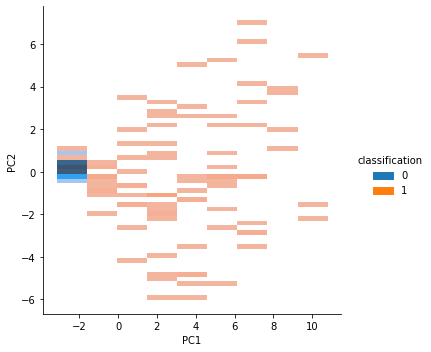

In [183]:
seaborn.displot(data=kidney_pca, x='PC1', y='PC2', hue='classification')

---
**Problem 7**

Based on the visualization in the previous problem, characterize the difference between patients who have kidney disease and do not have the disease in terms of the two principal components.


### Answer:

Patients with kidney disease may cluster distinctly from those without along the principal component axes, reflecting significant differences in underlying health variables captured by PCA.

---
**Problem 8**

Evaluate the performance of the same KNN model in problem 4, but with features that are transformed with the first 2 principal components.

Define the features and target explicitly.  


In [191]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split

X = new_data.drop(columns=['classification'])
y = new_data['classification'] 

X = pd.get_dummies(X, drop_first=True)
X = X.dropna()
y = y.loc[X.index]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

knn_model = KNeighborsClassifier(n_neighbors=9)

validator = ShuffleSplit(n_splits=100, test_size=0.05, random_state=300424)

knn_result = cross_validate(knn_model, X_pca, y, cv=validator, scoring=['accuracy'])

In [192]:
knn_result['test_accuracy'].mean()

0.9850000000000001

---
**Problem 9**

Compare the performance of the a decision tree to the KNN model in the previous problem, using features that are not transformed with PCA.

Define the features and target explicitly.  

---
**Problem 10**

Identify the 3 most important features contributing to predicting kidney disease.  Explain how you got this.
